# Binary classification

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 1- Data prepartion

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 2- Model Design

In [6]:
input_shape = x_train[1].shape
model = Sequential(
    [
        layers.Dense(units=16, activation="relu", input_shape=(input_shape)),
        layers.Dense(units=16, activation="relu"),
        layers.Dense(units=1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## 3- Training

In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    x=x_train, y=y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val)
)

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.5199 - accuracy: 0.7915 - val_loss: 0.3283 - val_accuracy: 0.8978
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2729 - accuracy: 0.9064 - val_loss: 0.2074 - val_accuracy: 0.9333
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.1989 - accuracy: 0.9288 - val_loss: 0.1595 - val_accuracy: 0.9498
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1593 - accuracy: 0.9463 - val_loss: 0.1307 - val_accuracy: 0.9605
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1337 - accuracy: 0.9559 - val_loss: 0.1092 - val_accuracy: 0.9696
Epoch 6/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1133 - accuracy: 0.9644 - val_loss: 0.0926 - val_accuracy: 0.9748
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0961 - accuracy: 0.9711 - val_loss: 0.0775 - val_accuracy: 0.9812
Epoch 8/20
49/49 [=

## 4- Evaluation

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

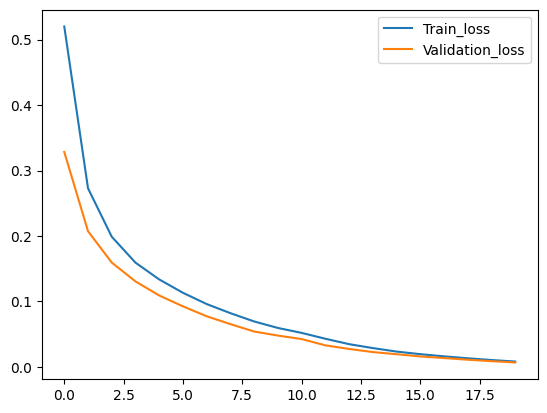

In [10]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]

plt.plot(losses, label="Train_loss")
plt.plot(val_losses, label="Validation_loss")
plt.legend()
plt.show()

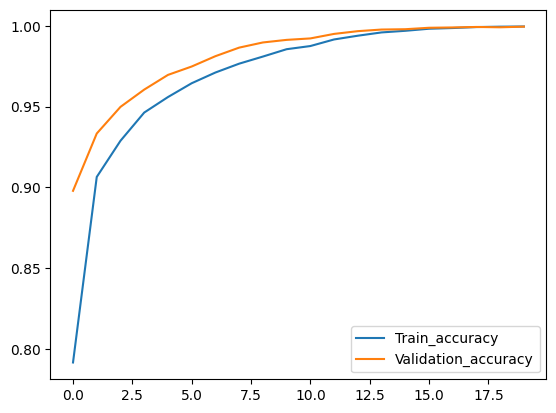

In [11]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(acc, label="Train_accuracy")
plt.plot(val_acc, label="Validation_accuracy")
plt.legend()
plt.show()

In [13]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.9026 - accuracy: 0.8478


[0.9025700092315674, 0.8478400111198425]

In [14]:
preds = model.predict(x_test)

782/782 [==============================] - 1s 913us/step


In [15]:
preds[preds < 0.5] = 0
preds[preds >= 0.5] = 1

In [16]:
print(
    classification_report(
        y_true=y_test, y_pred=preds, target_names=["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

